# Corrected data

Data of the 2D experiment corrected

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use("seaborn-colorblind")
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=14)    # legend fontsize


data = pd.read_csv('2D_pressure\corr_test.txt', sep="\s+",usecols=range(66))
data.head()

,Runnr,Alpha,Cd,Cl,Cm,Cn,Ct,Cd-press,Cl-press,Re,...,Cpl_017,Cpl_018,Cpl_019,Cpl_020,Cpl_021,Cpl_022,Cpl_023,Cn-corr,Ct-corr,Cm-corr
0,/,degrees,/,/,/,/,/,/,/,/,...,55.10000,60.10000,69.90000,75.00000,80.00000,90.00000,100.00000,/,/,/
1,1,-3.012,0.008454,-0.3024,0.0007,-0.3024,-0.007446,0.002570,-0.3028,7.335E+5,...,-0.43579,-0.35958,-0.20942,-0.14179,-0.09411,0.02927,0.16830,-0.3047,-0.013384,0.0010
2,2,-2.008,0.008468,-0.2041,0.0013,-0.2043,0.001312,0.001242,-0.2045,7.320E+5,...,-0.45152,-0.34189,-0.18742,-0.12582,-0.08501,0.03162,0.17063,-0.2058,-0.005939,0.0016
3,3,-1.004,0.008710,-0.1062,0.0014,-0.1063,0.006848,0.000799,-0.1064,7.317E+5,...,-0.40692,-0.35470,-0.17051,-0.11247,-0.07473,0.03571,0.17412,-0.1071,-0.001067,0.0015
4,4,-0.000,0.008660,-0.0046,0.0000,-0.0046,0.008660,0.000646,-0.0046,7.310E+5,...,-0.36568,-0.33161,-0.14959,-0.09750,-0.06346,0.04051,0.17620,-0.0047,0.000648,0.0000


## CL X AoA graphs

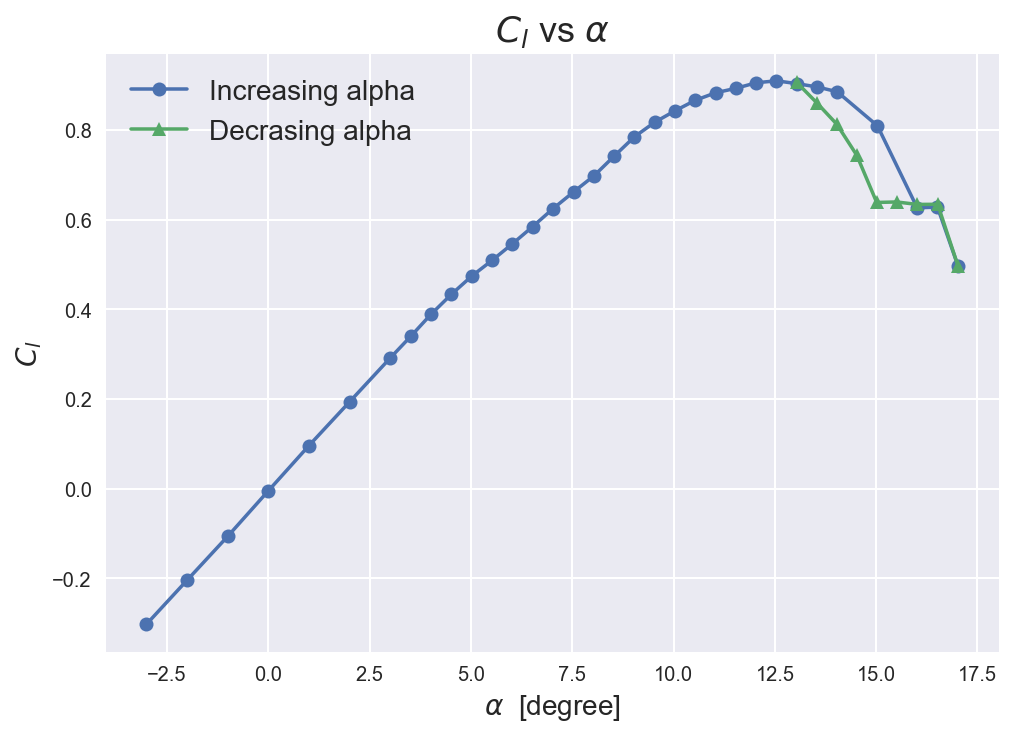

In [36]:
plt.title('$C_l$ vs $α$')
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing alpha')
plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing alpha')
plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_l$")
plt.grid(True)
plt.show()

## $C_d$ vs $C_l$ graphs

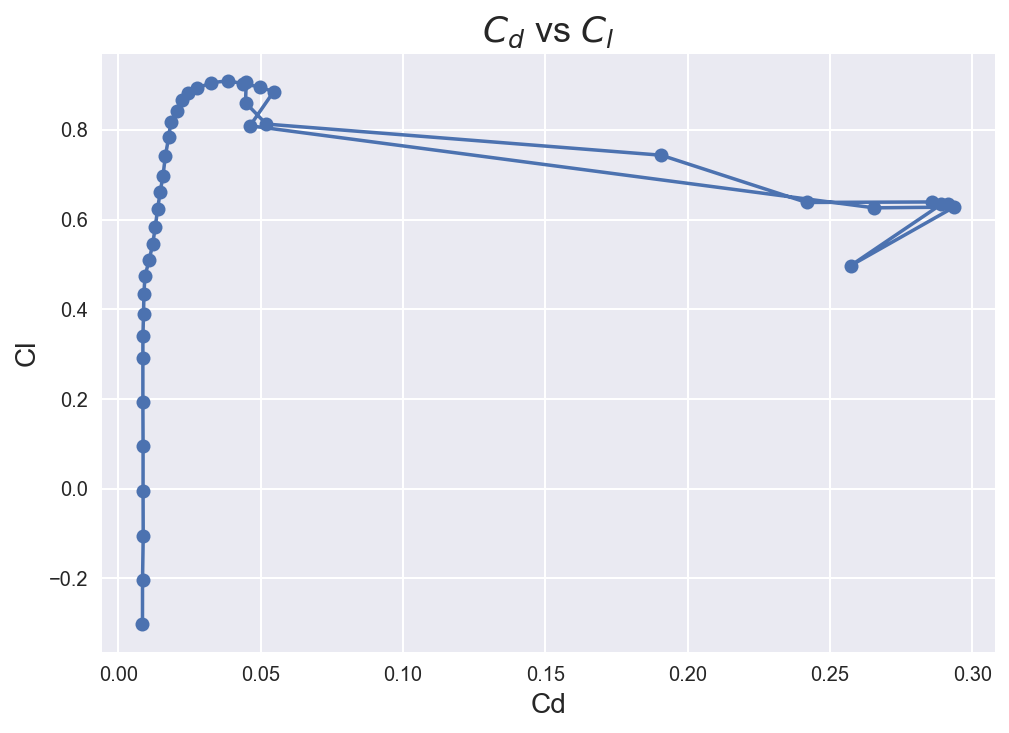

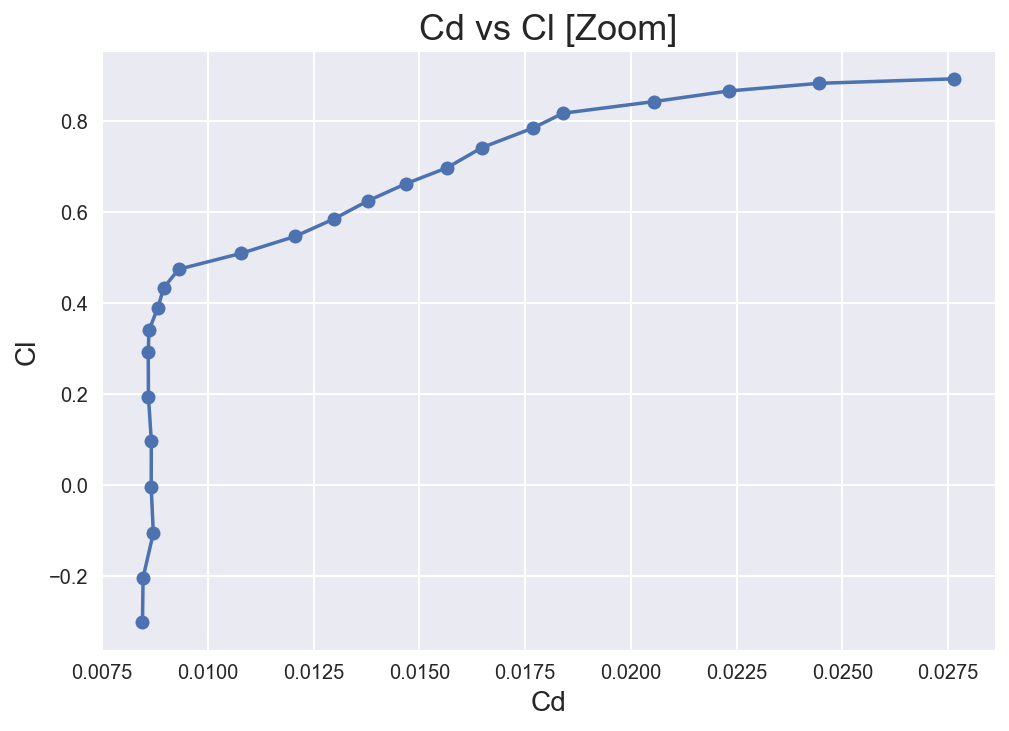

In [21]:

plt.title('$C_d$ vs $C_l$')
plt.plot(data['Cd'][1:].to_numpy(dtype='float'),data['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()

plt.title('Cd vs Cl [Zoom]')
plt.plot(data['Cd'][1:25].to_numpy(dtype='float'),data['Cl'][1:25].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()

# Uncorrected data

Data of the 2D experiment before the correction

In [33]:
dataUnc = pd.read_csv('2D_pressure/unc_test.txt', sep="\s+",usecols=range(66))
dataUnc

,Runnr,Alpha,Cn,Ct,Cm,Cd,Cl,Cl-press,Cd-press,Z-w.r.,...,Cpl_014,Cpl_015,Cpl_016,Cpl_017,Cpl_018,Cpl_019,Cpl_020,Cpl_021,Cpl_022,Cpl_023
0,/,degrees,/,/,/,/,/,/,/,mm,...,40.00000,45.00000,49.60000,55.10000,60.10000,69.90000,75.00000,80.00000,90.00000,100.00000
1,1,-3.000,-0.3047,-0.007475,0.0010,0.008480,-0.3046,-0.3050,0.002580,0.00,...,-0.63659,-0.59054,-0.54403,-0.43579,-0.35958,-0.20942,-0.14179,-0.09411,0.02927,0.16830
2,2,-2.000,-0.2058,0.001313,0.0016,0.008494,-0.2056,-0.2059,0.001246,0.00,...,-0.58559,-0.54120,-0.49093,-0.45152,-0.34189,-0.18742,-0.12582,-0.08501,0.03162,0.17063
3,3,-1.000,-0.1071,0.006869,0.0015,0.008737,-0.1070,-0.1071,0.000802,0.00,...,-0.53740,-0.49806,-0.44824,-0.40692,-0.35470,-0.17051,-0.11247,-0.07473,0.03571,0.17412
4,4,0.000,-0.0047,0.008686,0.0000,0.008686,-0.0047,-0.0047,0.000648,0.00,...,-0.48985,-0.45623,-0.40916,-0.36568,-0.33161,-0.14959,-0.09750,-0.06346,0.04051,0.17620
5,5,1.000,0.0972,0.006994,-0.0013,0.008689,0.0971,0.0972,0.001167,0.00,...,-0.44350,-0.41581,-0.37288,-0.32923,-0.29431,-0.13003,-0.08244,-0.05224,0.04482,0.17795
6,6,2.000,0.1956,0.001797,-0.0010,0.008622,0.1954,0.1956,0.002362,0.00,...,-0.39530,-0.37362,-0.33563,-0.29388,-0.25717,-0.12831,-0.06674,-0.03934,0.05035,0.18085
7,7,3.000,0.2941,-0.006782,-0.0003,0.008617,0.2940,0.2942,0.004397,0.00,...,-0.34759,-0.33178,-0.29904,-0.26047,-0.22382,-0.14396,-0.05165,-0.02670,0.05535,0.18303
8,8,3.500,0.3421,-0.012275,0.0000,0.008634,0.3422,0.3424,0.005493,0.00,...,-0.32470,-0.31172,-0.28158,-0.24496,-0.20901,-0.14036,-0.04658,-0.02066,0.05766,0.18357
9,9,4.000,0.3916,-0.018514,0.0002,0.008844,0.3919,0.3920,0.006800,0.00,...,-0.30154,-0.29123,-0.26373,-0.22915,-0.19432,-0.13232,-0.04652,-0.01461,0.05991,0.18367


## Cl cd

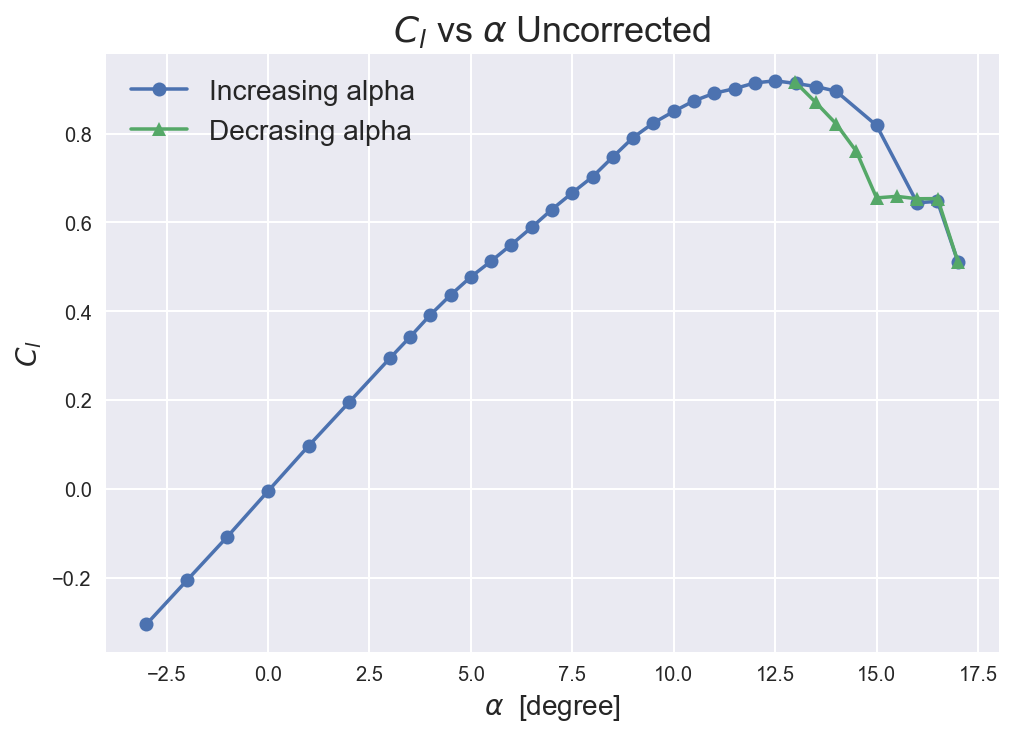

In [39]:
plt.title('$C_l$ vs $α$ Uncorrected')
plt.plot(dataUnc['Alpha'][1:34].to_numpy(dtype='float'),dataUnc['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing alpha')
plt.plot(dataUnc['Alpha'][33:].to_numpy(dtype='float'),dataUnc['Cl'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing alpha')

plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_l$")
plt.grid(True)
plt.show()

## $C_d$ vs $C_l$ graphs Uncorrected

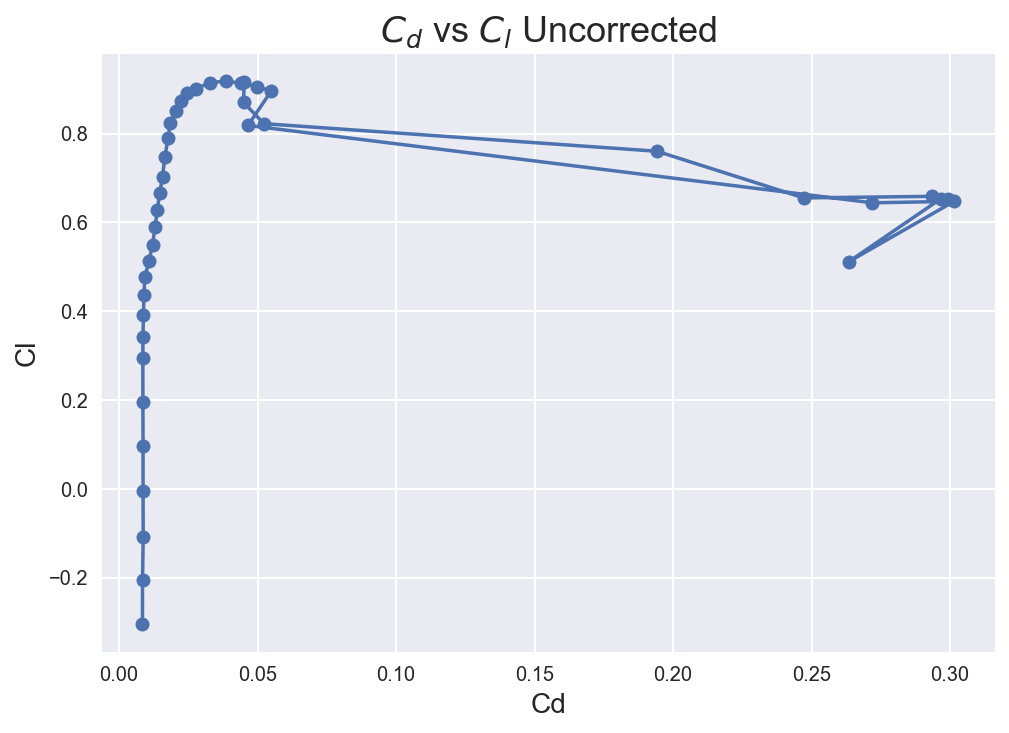

In [50]:
plt.title('$C_d$ vs $C_l$ Uncorrected')
plt.plot(dataUnc['Cd'][1:].to_numpy(dtype='float'),dataUnc['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()

# Comparison 
Graphs comparing the corrected and uncorrected data

## Cl vs AoA

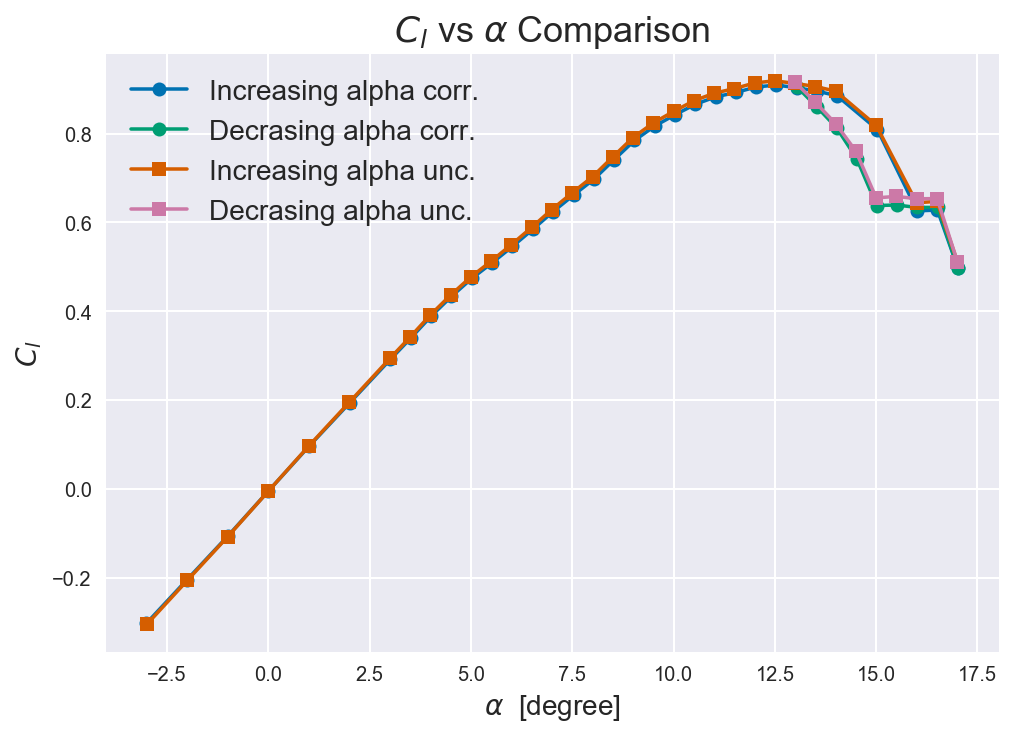

In [66]:
plt.title('$C_l$ vs $α$ Comparison')


plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing alpha corr.')
plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="o", label='Decrasing alpha corr.')

plt.plot(dataUnc['Alpha'][1:34].to_numpy(dtype='float'),dataUnc['Cl'][1:34].to_numpy(dtype='float'),  marker="s", label='Increasing alpha unc.')
plt.plot(dataUnc['Alpha'][33:].to_numpy(dtype='float'),dataUnc['Cl'][33:].to_numpy(dtype='float'),  marker="s", label='Decrasing alpha unc.')


plt.legend()
plt.savefig("test.png", dpi=200)
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_l$")
plt.grid(True)



plt.show()

## Drag polar comparison

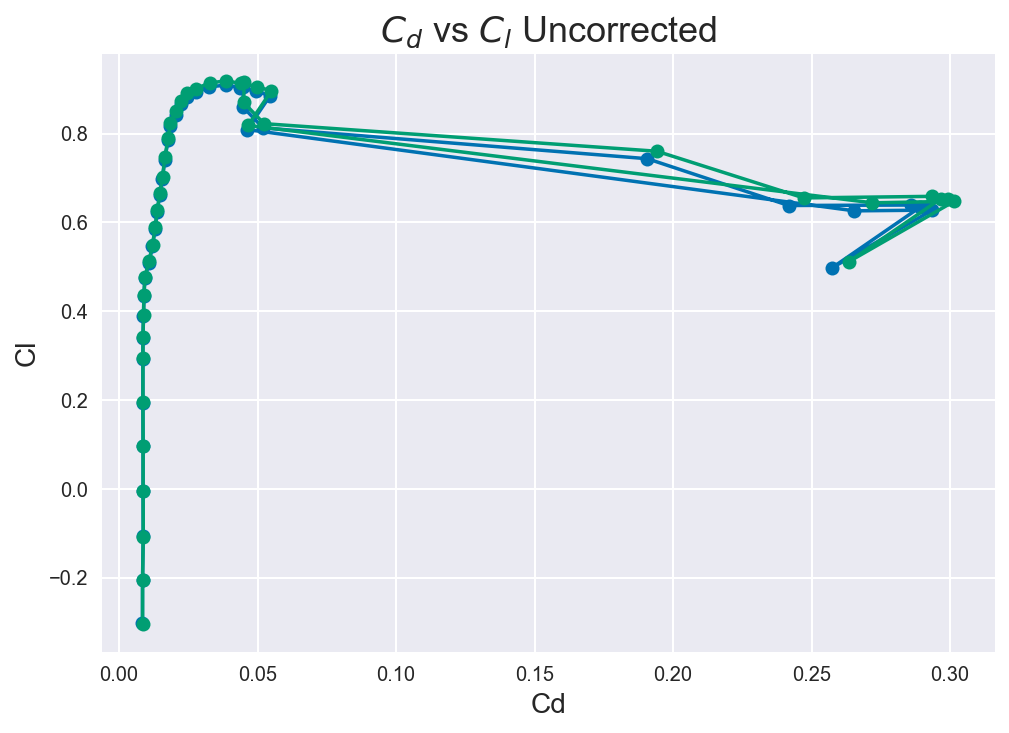

In [67]:
plt.title('$C_d$ vs $C_l$ Uncorrected')
plt.plot(data['Cd'][1:].to_numpy(dtype='float'),data['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.plot(dataUnc['Cd'][1:].to_numpy(dtype='float'),dataUnc['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()